### Projeto Organizando uma eleição

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
from IPython.display import clear_output
from time import sleep

class Apartamento:
    '''
    Cria um apartamento
    
    '''
    
    def __init__(self,numero_apartamento):
        '''
        Construtor do apartamento, a identificação será uma 
        string pois o condomínio pode conter vários blocos e
        a numeração poderá repetir. ex: 101A , 101B.
        
        Parametros:
        numero_apartamento : str
        
        '''
        self._lista_moradores = []
        self._status_votacao = False
        self._numero_apartamento = numero_apartamento
    
    def __repr__(self):
        return f'Nº Apartamento: {self._numero_apartamento},Moradores: {self._lista_moradores}, Votou?: {self._status_votacao}'

    def adiciona_morador(self, morador):
        '''
        Adciciona objeto Morador a lista de moradores do partamento.
        Caso o input não seja objeto Morador imprime mensagem de erro.
        
        Parâmetros:
        
        morador : Morador          
        
            Objeto da classe Morador.
        '''
        if(isinstance(morador, Morador)):
            self._lista_moradores.append(morador)
            morador._apartamento = self
        else:
            print("Morador inválido. Não é um objeto Morador")
    
    def lista_moradores(self):
        '''
        Imprime lista de moradores do apartamento.
        '''
        lista_moradores = [{"Apartamento "+str(self._numero_apartamento): morador._nome} for morador in self._lista_moradores]
        df = pd.DataFrame(lista_moradores)
        display(df) 

class Morador:
    '''
    Cria um morador
    
    '''
    
    def __init__(self, nome):
        '''
        Costrutor do objeto Morador com nome e variavel apartamento que irá ser usada na classe Apartamento.
        
        Parâmetros:
        
        nome : str
            Nome do indivíduo que será usado como identificação do objeto Morador
        
        
        '''
        if(isinstance(nome,str)):
            self._nome = nome
            self._apartamento = None
        else:
            print("O nome deve ser uma string")
      
    def __repr__(self):
        '''
        Método mágico para melhor visualização objeto Morador.
        '''
        return f'Morador: {self._nome}'
    
    def vota_candidato(self, urna, numero_candidato):
        '''
        Captura a escolha do candidato pelo morador
        
        Parâmetros:
        
        urna : Urna
            objeto da classe Urna
        numero_candidato : int
            número do candidato gerado no cadastro de candidatos na urna
            
        Retorno:
            Retorna False se o apartamento já tiver executado o voto
            Retorna a função executa_voto, contabilizando o voto no candidato e apartamento.
        '''
        if(isinstance(urna, Urna)):
            if(isinstance(numero_candidato,int)):
                if self._apartamento._status_votacao:
                    print("Voto do apartamento já contabilizado. Não é possível votar 2 vezes.")
                    return False
                else:
                    return urna.executa_voto(self._apartamento, numero_candidato)
            else:
                print("Nº do candidato inválido.")
        else:
            print("Urna inválida. Não é um objeto Urna")
                
class Candidato(Morador):
    '''
    Classe filha da classe Morador.
    Estabelece o morador escolhido como candidato a síndico.
    
    '''
    
    def __init__(self, morador):
        '''
        Construtor de candidato usando o objeto da classe Morador. 
                
        Parâmetros:
        
        morador : Morador
            Objeto do morador que se candidatou ao cargo de síndico.
        '''
        
        if(isinstance(morador,Morador)):
            self._nome = morador._nome
            self._apartamento = morador._apartamento
            self._numero_urna = 0
            self._contagem_votos = 0
        else:
            print("Morador inválido. Não é um objeto Morador")

    def __repr__(self):
        '''
        Método mágico para melhor visualização objeto Morador.
        '''
        return f'Candidato: {self._nome}, Número Urna: {self._numero_urna}'

    def atualiza_votos(self):
        '''
        Atualização no contador de votos do candidato.
        Requisitado na função executa_voto.
        '''
        self._contagem_votos = self._contagem_votos + 1

    
class Urna:
    '''
    Define o funcionamento da votação.
    '''
    def __init__(self):
        '''
        Construtor da classe urna que recebe informação das classes
        Apartamento, Morador, Candidato e inicia a contagem dos votos.
        
        '''
        self._lista_candidatos = dict()
        self._lista_apartamentos = []
        
    def cadastra_apartamento(self,apartamento):
        '''
        Cadastra um apartamento na urna.
        
        Parâmetros:
        
        apartamento : Apartamento
        '''
        if(isinstance(apartamento,Apartamento)):
            self._lista_apartamentos.append(apartamento)
        else:
            print("Apartamento inválido. Não é um objeto Apartamento")
            
    def cadastra_candidato(self, candidato):
        '''
        Cadastra um candidato na urna, atribui seu número aleatório de votação
        e atualiza o objeto candidato com seu número de urna
        
        Parâmetros:
        
        candidato : Candidato
        '''
        if(isinstance(candidato, Candidato)):
            numero_candidato = choice([i for i in range(1,100) if i not in self._lista_candidatos.keys()])
            candidato._numero_urna = numero_candidato
            self._lista_candidatos.update({numero_candidato:candidato})
        else:
            print("Candidato inválido. Não é um objeto Candidato")
            
    def executa_voto(self, apartamento, numero_candidato):
        '''
        Executa o voto do morador/apartamento, requisitado na função vota_candidato da classe Morador
        
        Parâmetros:
        
        apartamento : Apartamento
            objeto da classe Apartamento
        numero_candidato : int
            número do candidato gerado pela urna
            
        Retorno:
            False se ainda existem apartamentos para votar
            True se todos apartamentos já votaram
            
        '''
        if not isinstance(apartamento, Apartamento):
            print("Apartamento inválido. Não é um objeto Apartamento")
        elif numero_candidato not in self._lista_candidatos.keys():
            print("Nº de candidato não registrado. Tente novamente")
        elif apartamento not in self._lista_apartamentos:
            print("Apartamento não habilitado para votar.")
        else:
            self._lista_candidatos[numero_candidato].atualiza_votos()
            apartamento._status_votacao = True
            self._lista_apartamentos.remove(apartamento)
            print('\n\n\n\nVoto contabilizado com sucesso!')
            if(len(self._lista_apartamentos) == 0):
                return True
        return False
      
    def mostra_candidatos(self):
        '''
        Imprime o painel com a numeração que deverá ser usada na urna.
        '''
        lista_candidato = [{"Candidato": candidato._nome,"Nº Urna": key} for key,candidato in self._lista_candidatos.items()]
        df = pd.DataFrame(lista_candidato)
        display(df)
        
    def imprime_resultado(self):
        '''
        Plota um gráfico de barras com a contagem dos votos.
        '''
        candidatos = [candidato._nome for candidato in self._lista_candidatos.values()]
        votos = [candidato._contagem_votos for candidato in self._lista_candidatos.values()]
        plt.bar(candidatos, votos)
        plt.title('Resultado das eleições')
        plt.xlabel('Candidatos')
        plt.ylabel('Votos')

### ETAPA 1: Cadastro

In [2]:
apartamentos_existentes = {}
moradores_existentes = []
candidatos_existentes = []

arquivo_csv = pd.read_csv('moradores.csv', delimiter = ';', encoding = 'utf8')

display_moradores = {'Nome do Morador':[],'Apartamento':[],'Candidato':[]}
for linha in arquivo_csv.values:
    display_moradores['Nome do Morador'].append(linha[0])
    display_moradores['Apartamento'].append(linha[1].upper())
    display_moradores['Candidato'].append(linha[2])
display_moradores = pd.DataFrame(display_moradores)
    
#CADASTRO DE APARTAMENTOS
lista_app = list(set([linha for linha in display_moradores['Apartamento']]))
for app_nome in lista_app:
    apartamentos_existentes[app_nome] = Apartamento(app_nome)
    
#CADASTRO DE MORADORES E CANDIDATOS
for linha in display_moradores.values:
    novo_morador = Morador(linha[0])
    moradores_existentes.append(novo_morador)
    apartamentos_existentes[linha[1]].adiciona_morador(novo_morador)
    if linha[2]:
        candidatos_existentes.append(Candidato(novo_morador))

### ETAPA 2: Configuração

In [3]:
urna = Urna()

#cadastrado de apartamentos na urna
for apartamento in apartamentos_existentes.values():
    urna.cadastra_apartamento(apartamento)
    
#cadastrado de candidatos na urna
for candidato in candidatos_existentes:
    urna.cadastra_candidato(candidato)

### ETAPA 3: Votação

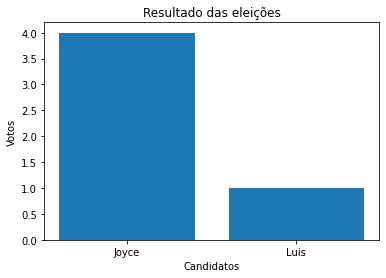

In [4]:
terminou = False
display(display_moradores)
while terminou == False:
    quemVaiVotar = input('Digite o id de qual morador vai votar: ')
    if quemVaiVotar.isnumeric():  
        quemVaiVotar = int(quemVaiVotar)
        if quemVaiVotar in display_moradores.index:
            print()
            print('Olá ',moradores_existentes[quemVaiVotar]._nome)
            print('\nSelecione um candidato abaixo:')
            urna.mostra_candidatos()
            seuCandidato = input('Digite o número do seu candidato: ')
            if seuCandidato.isnumeric():
                seuCandidato = int(seuCandidato)
                clear_output(wait=True)
                terminou = moradores_existentes[quemVaiVotar].vota_candidato(urna, seuCandidato)
                sleep(2)
                display(display_moradores)
            else:
                print('\33[0;31;40m Verifique o número do candidato e tente novamente\33[m')
        else:
            print('Morador não está na lista de votação')
    else:
        print('\33[0;31;40m Verifique o id do morador e tente novamente\33[m')
clear_output(wait=True)
urna.imprime_resultado()